# Tratamento dos dados

In [25]:
#imports
from pandas import Series
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.feature_extraction.text import CountVectorizer

In [26]:
# Carregando os arquivos e salvando em um dataframe
load_file = "dados_compras.json"
purchase_file = pd.read_json(load_file, orient = "records")
purchase_file.head()

,Login,Idade,Sexo,Item ID,Nome do Item,Valor
0,Aelalis34,38,Masculino,165,Bone Crushing Silver Skewer,3.37
1,Eolo46,21,Masculino,119,"Stormbringer, Dark Blade of Ending Misery",2.32
2,Assastnya25,34,Masculino,174,Primitive Blade,2.46
3,Pheusrical25,21,Masculino,92,Final Critic,1.36
4,Aela59,23,Masculino,63,Stormfury Mace,1.27


In [27]:
#verificar se foi criado a tabela
type(purchase_file)

pandas.core.frame.DataFrame

In [28]:
# verificar a quantidade de linhas e da colunas do dataframe
purchase_file.shape

(780, 6)

In [ ]:
#verificar estatísticas das colunas do dataframe (para ser utilizado mais tarde para entedner se os futuros dados obitos fazem sentido)
print(purchase_file.describe())

# Informações dos Consumidores
* Número total de consumidores
* Número total de vendas

In [30]:
#verificar o total de vendas e de consumidores (se há mais de uma venda por consumidor)
total_vendas = purchase_file['Login'].count()
total_consumidores = purchase_file['Login'].drop_duplicates().count()
print("A quantidade total de vendas foi de %s e o total de consumidores é de %s consumidores " % (total_vendas, total_consumidores))

A quantidade total de vendas foi de 780 e o total de consumidores é de 573 consumidores 


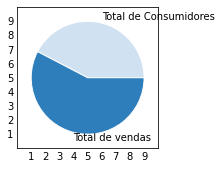

In [31]:
#plotar total de consumidores vs total de vendas em um gráfico de pizza
#style
plt.style.use('_mpl-gallery-nogrid')
#data
x = [total_consumidores, total_vendas]
#color
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(x)))
#plot
#mehorar label
label = [ 'Total de Consumidores', 'Total de vendas']
fig, ax = plt.subplots()
ax.pie(x, colors = colors, radius = 4, center = (5,5), wedgeprops = {"linewidth":1, "edgecolor":"white"}, frame = True, labels= label)

ax.set(xlim = (0,10), xticks = np.arange(1,10), ylim= (0,10), yticks = np.arange(1,10))

plt.show()

# Análise Geral de Compras
* Número de itens exclusivos
* Preço médio de compra
* Número total de compras
* Rendimento total

In [ ]:
#verificando se existems valores exclusivos, eliminando duplicatas e contandoas
def exclusivos():
    def tabelas(): #trazer tabelas separadas de cada coluna sem itens duplicados
        tot0 = pd.DataFrame(data = purchase_file['Login']).drop_duplicates()
        tot1 = pd.DataFrame(data = purchase_file['Idade']).drop_duplicates()
        tot2 = pd.DataFrame(data = purchase_file['Sexo']).drop_duplicates()
        tot3 = pd.DataFrame(data = purchase_file['Item ID']).drop_duplicates()
        tot4 = pd.DataFrame(data = purchase_file['Nome do Item']).drop_duplicates()
        display(tot0, tot1, tot2, tot3, tot4)

    def duplicata(): #trazer o resumo do total de valores exclusivos de cada coluna
        tot0 =  purchase_file['Login'].drop_duplicates().count()
        tot1 =  purchase_file['Idade'].drop_duplicates().count()
        tot2 =  purchase_file['Sexo'].drop_duplicates().count()
        tot3 =  purchase_file['Item ID'].drop_duplicates().count()
        tot4 =  purchase_file['Nome do Item'].drop_duplicates().count()
        print({'Login': tot0, 'Idade': tot1, 'Sexo': tot2, 'Item ID': tot3, 'Nome do Item': tot4})
    tabelas()
    duplicata()
exclusivos()


In [33]:
#preço médio das compras
def preco_medio():
    media_vendas = np.mean(purchase_file['Valor'])
    print(f" O preço médio das vendas é de R${media_vendas:.2f}")
    #O ponto é para indicar que temos um separador decimal;
    #O N é o número de casas decimais que vamos ter;
    #E o f é para indicar que temos um float, ou seja, um número com casas decimais.
preco_medio()

 O preço médio das vendas é de R$2.93


In [34]:
#calculando rendimento total
rendimento_total = np.sum(purchase_file['Valor'])
print(f"O rendimento total foi de R$ {rendimento_total:,.2f}")

O rendimento total foi de R$ 2,286.33


# Informações Demográficas Por Gênero

* Porcentagem e contagem de compradores masculinos
* Porcentagem e contagem de compradores do sexo feminino
* Porcentagem e contagem de outros / não divulgados

In [35]:
def contagem():
    masc = len(purchase_file.loc[purchase_file['Sexo'] == 'Masculino'])
    fem = len(purchase_file.loc[purchase_file["Sexo"] == 'Feminino'])
    others = len(purchase_file.loc[purchase_file['Sexo'] == 'Outro / Não Divulgado'])
    print("Número de pessoas do sexo masculino: {0} ({1:.2f}%)".format(masc, (masc / (masc + fem + others))*100))# configurar a visualização de valores
    print("Número de pessoas do sexo feminino: {0} ({1:.2f}%)".format(fem, (masc / (masc + fem + others))*100))
    print("Número de pessoas que não divulgaram: {0} ({1:.2f}%)".format(others, (masc / (masc + fem + others))*100))

In [36]:
contagem()

Número de pessoas do sexo masculino: 633 (81.15%)
Número de pessoas do sexo feminino: 136 (81.15%)
Número de pessoas que não divulgaram: 11 (81.15%)


<AxesSubplot:>

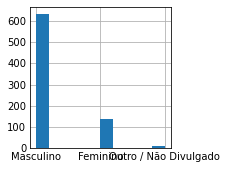

In [37]:
#histograma para visualizar a quantidade de dados
# pesquisar alguma gráfico no seaborn
purchase_file.Sexo.hist()

# Análise de Compras Por Gênero 

* Número de compras
* Preço médio de compra
* Valor Total de Compra
* Compras for faixa etária

In [38]:
#puxar uma séria filtrando apenas o gênero e calcular o preço médio das compras
def genero():
    gen_masc = purchase_file.loc[purchase_file['Sexo'] == 'Masculino']
    gen_fem = purchase_file.loc[purchase_file['Sexo'] == 'Feminino']
    def analises():
        masc_media = pd.DataFrame(data = gen_masc, columns = ['Valor']).median()
        masc_sum = pd.DataFrame(data = gen_masc, columns = ['Valor']).sum()
        masc_compras = pd.DataFrame(data = gen_masc, columns= ['Valor']).count()
        fem_media = pd.DataFrame(data = gen_fem, columns = ['Valor']).median()
        fem_sum = pd.DataFrame(data = gen_fem, columns = ['Valor']).sum()
        fem_compras = pd.DataFrame(data = gen_fem, columns= ['Valor']).count()
        result = pd.DataFrame(data = {'Masculino':[masc_media, masc_sum, masc_compras],'Feminino': [fem_media,fem_sum, fem_compras]} , index= ['Média', 'Soma', 'Total de Compras'])
        display(result) # retirar o texto de objetc
    analises()

In [39]:
genero()# colocar tabelas personalizadas do matplotlib

,Masculino,Feminino
Média,Valor 2.91 dtype: float64,Valor 2.615 dtype: float64
Soma,Valor 1867.68 dtype: float64,Valor 382.91 dtype: float64
Total de Compras,Valor 633 dtype: int64,Valor 136 dtype: int64


# Identifique os 5 principais compradores pelo valor total de compra e, em seguida, liste (em uma tabela):

* Login
* Número de compras
* Preço médio de compra
* Valor Total de Compra
* Itens mais populares

In [40]:
principais = pd.DataFrame(data= purchase_file).groupby(['Login'])["Valor"]
principais.head(5)


0      3.37
1      2.32
2      2.46
3      1.36
4      1.27
       ... 
775    3.62
776    1.36
777    4.15
778    1.72
779    3.61
Name: Valor, Length: 780, dtype: float64

#  Identifique os 5 itens mais populares por contagem de compras e, em seguida, liste (em uma tabela):

* ID do item
* Nome do item
* Número de compras
* Preço do item
* Valor Total de Compra
* Itens mais lucrativos

In [42]:
# Cálculos básicos
user_total = purchase_file.groupby(["Login"]).sum()["Valor"].rename("Valor Total de Compra")
user_average = purchase_file.groupby(["Login"]).mean()["Valor"].rename("Valor Médio de Compra")
user_count = purchase_file.groupby(["Login"]).count()["Valor"].rename("Número de Compras")

# Dataframe para os resultados
user_data = pd.DataFrame({"Valor Total de Compra": user_total, "Valor Médio de Compra": user_average, "Número de Compras": user_count})

# Data Munging
user_data ["Valor Total de Compra"] = user_data["Valor Total de Compra"].map("${:,.2f}".format)
user_data ["Valor Médio de Compra"] = user_data["Valor Médio de Compra"].map("${:,.2f}".format)
user_data.sort_values("Valor Total de Compra", ascending=False).head(5)

,Valor Total de Compra,Valor Médio de Compra,Número de Compras
Login,,,
Qarwen67,$9.97,$2.49,4
Sondim43,$9.38,$3.13,3
Tillyrin30,$9.19,$3.06,3
Lisistaya47,$9.19,$3.06,3
Tyisriphos58,$9.18,$4.59,2


# Identifique os 5 itens mais lucrativos pelo valor total de compra e, em seguida, liste (em uma tabela):

* ID do item
* Nome do item
* Número de compras
* Preço do item
* Valor Total de Compra